In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np

from mltu.inferenceModel import OnnxInferenceModel
from mltu.utils.text_utils import ctc_decoder, get_cer
from tqdm import tqdm
from matplotlib import patheffects

### Rodar o modelo

In [2]:
class ImageToWordModel(OnnxInferenceModel):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def predict(self, image: np.ndarray):
        image = cv2.resize(image, self.input_shape[:2][::-1])

        image_pred = np.expand_dims(image, axis=0).astype(np.float32)

        preds = self.model.run(None, {self.input_name: image_pred})[0]

        text = ctc_decoder(preds, self.vocab)[0]

        return text

In [3]:
model = ImageToWordModel("./Models/model.onnx")

### Salvar a acurácia do modelo com o dataset de teste

In [29]:
df = pd.read_csv('./Models/val_BR.csv')
df.head()

,0,1
0,../data/data_20230622/23776.jpeg,SAL
1,../data/data_20230622/21687.jpeg,amor
2,../data/data_20230622/17660.jpeg,TERA
3,../data/data_20230622/19069.jpeg,amo
4,../data/data_20230622/20367.jpeg,GOSTO DE CEBOLIHA NA SALADA


In [35]:
acuracy = 0
total = 0

# Criar o DataFrame para armazenar os resultados
df_test = pd.DataFrame(columns=['Predict', 'Label'])

for i in tqdm(range(len(df))):
    image = cv2.imread(df['0'][i])
    text = model.predict(image)  
    if text.upper() == df['1'][i].upper():
        acuracy += 1
    total += 1
    data = {'Predict': [text.upper()], 'Label': [df['1'][i].upper()]}
    # salvar no csv df_test
    df_test = pd.concat([df_test, pd.DataFrame(data)], ignore_index=True)
    
# Criar DataFrame com a acurácia
accuracy_data = {'Predict': ['Accuracy:'], 'Label': [acuracy / total]}
df_accuracy = pd.DataFrame(accuracy_data)

# Concatenar DataFrame df_accuracy com df_test
df_test = pd.concat([df_test, df_accuracy], ignore_index=True)    
    
# Salvar o DataFrame no arquivo test.csv
df_test.to_csv('accuracy.csv', index=False)   
 
print("Accuracy: ", acuracy / total)


100%|██████████| 1138/1138 [00:02<00:00, 410.31it/s]

Accuracy:  0.30667838312829526


In [36]:
df = pd.read_csv('./labels_BR.csv')
df.head()

,ID,Label
0,../data/data_20230622/14881.jpeg,Natureza
1,../data/data_20230622/14882.jpeg,Planeta
2,../data/data_20230622/14883.jpeg,Terra
3,../data/data_20230622/14884.jpeg,Flor
4,../data/data_20230622/14885.jpeg,O nosso planeta é muito bonito


In [37]:
def save_image(image, image_path, label, prediction_text, distance):
    
    plt.imshow(image)
    plt.title(f"Label: {label}\n Prediction: {prediction_text}\n Distance: {distance}", color='yellow', path_effects=[patheffects.withStroke(linewidth=3, foreground='black')])
    if not os.path.isfile(f"../data/imagens_BR/{image_path.split('/')[-1]}"): 
        plt.savefig(f"../data/imagens_BR/{image_path.split('/')[-1]}")
    else:
        print("existe")

### Plote de 1 imagem para teste

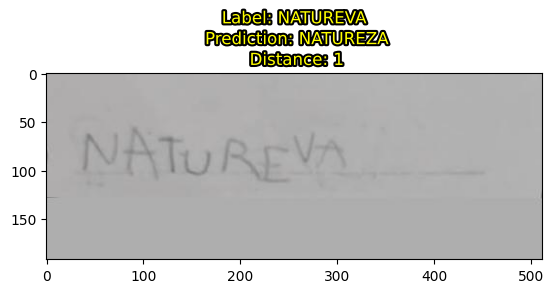

In [38]:
# plotar apenas uma imagem para teste
image_path = df['ID'].iloc[10]
image = cv2.imread(image_path)
text = model.predict(image)
result = get_cer(df['Label'].iloc[10].upper(), text.upper())
if isinstance(result, float):
    cer = result
    distance = None  # Defina um valor padrão para a distância, se necessário
else:
    cer, distance = result
plt.imshow(image)
plt.title(f"Label: {df['Label'].iloc[10]}\n Prediction: {text}\n Distance: {distance}", color='yellow', path_effects=[patheffects.withStroke(linewidth=3, foreground='black')]);

### Salvar as imagens com a label, predição e distance

17it [00:00, 83.63it/s]

Label: Natureza - Text: NATUREZA - CER: 0.0 - Distance: 0
existe
Label: Planeta - Text: PLANETA - CER: 0.0 - Distance: 0
existe
Label: Terra - Text: TERRA - CER: 0.0 - Distance: 0
existe
Label: Flor - Text: FLOR - CER: 0.0 - Distance: 0
existe
Label: O nosso planeta é muito bonito - Text: O NOSSO PLANETA É MUITO BONITO - CER: 0.0 - Distance: 0
existe
Label: Natureza - Text: NATURESA - CER: 0.125 - Distance: 1
existe
Label: Planeta - Text: PLANETA - CER: 0.0 - Distance: 0
existe
Label: Terra - Text: TERRA - CER: 0.0 - Distance: 0
existe
Label: Flor - Text: FLOR - CER: 0.0 - Distance: 0
existe
Label: Kauane Sofia Alves: O nosso planeta é muito bonito - Text: O NOSSO PLANETA É MUITO BONITO - CER: 0.6666666666666666 - Distance: 20
existe
Label: NATUREVA - Text: NATUREZA - CER: 0.125 - Distance: 1
existe
Label: PANETA - Text: PANETA - CER: 0.0 - Distance: 0
existe
Label: TERA - Text: TERA - CER: 0.0 - Distance: 0
existe
Label: FORE - Text: FLOR - CER: 0.5 - Distance: 2
existe
Label: O NOSE 

26it [00:00, 81.77it/s]

Label: PERA - Text: TERA - CER: 0.25 - Distance: 1
existe
Label: FULI - Text: FLOR - CER: 0.75 - Distance: 3
existe
Label: NATUREZA - Text: NATUREZA - CER: 0.0 - Distance: 0
existe
Label: PLANETA - Text: PLANETA - CER: 0.0 - Distance: 0
existe
Label: TERRA - Text: TERRA - CER: 0.0 - Distance: 0
existe
Label: FLOR - Text: FLOR - CER: 0.0 - Distance: 0
existe
Label: O NOSSO PLANETA E MUITO BONITO - Text: O NOSSO PLANETA É MUITO BONITO - CER: 0.03333333333333333 - Distance: 1
existe
Label: NATURESA - Text: NATURESA - CER: 0.0 - Distance: 0
existe
Label: PLANETA - Text: PLANETA - CER: 0.0 - Distance: 0
existe
Label: TERRA - Text: TERRA - CER: 0.0 - Distance: 0
existe
Label: FLOR - Text: FLOR - CER: 0.0 - Distance: 0
existe
Label: O NOSSO PLAETA E MUITO BONITO - Text: O NOSSO PLANETA É MUITO BONITO - CER: 0.06666666666666667 - Distance: 2
existe
Label: NATORESA - Text: NATUREZA - CER: 0.25 - Distance: 2
existe
Label: PLANETA - Text: PLANETA - CER: 0.0 - Distance: 0
existe
Label: TÉRRA - Tex

44it [00:00, 82.78it/s]

Label: O NOSSO PLANETA É MUITO BONITO - Text: O NOSSO PLANETA E MUITO BONITO - CER: 0.03333333333333333 - Distance: 1
existe
Label: NATUREZA - Text: NATUREZA - CER: 0.0 - Distance: 0
existe
Label: PLANETA - Text: PLANETA - CER: 0.0 - Distance: 0
existe
Label: TERRA - Text: TERRA - CER: 0.0 - Distance: 0
existe
Label: FLOR - Text: FLR - CER: 0.3333333333333333 - Distance: 1
existe
Label: O NOSSO PLANETA BONITO - Text: O NOSSO PLANETA É MUITO BONITO - CER: 0.26666666666666666 - Distance: 8
existe
Label: NATURESA - Text: NATUREZA - CER: 0.125 - Distance: 1
existe
Label: PLANETA - Text: PLANETA - CER: 0.0 - Distance: 0
existe
Label: TERRA - Text: TERRA - CER: 0.0 - Distance: 0
existe
Label: FLOR - Text: TERA - CER: 1.0 - Distance: 4
existe
Label: O NOSSO PLANETA É MUITO BONITO - Text: O NOSSO PLANETA É MUITO BONITO - CER: 0.0 - Distance: 0
existe
Label: NATULESA - Text: NATUREZA - CER: 0.25 - Distance: 2
existe
Label: PALLETA - Text: PALETA - CER: 0.16666666666666666 - Distance: 1
existe
L

62it [00:00, 82.17it/s]

Label: PÃONETA  - Text: PANETA - CER: 0.5 - Distance: 3
existe
Label: TERA  - Text: TERA - CER: 0.25 - Distance: 1
existe
Label: FOLA - Text: FERA - CER: 0.5 - Distance: 2
existe
Label: NOSO PÃONETA E MUTU BUNTO - Text: O NOSSO PLANETA E MUTO BONITO - CER: 0.27586206896551724 - Distance: 8
existe
Label: AOEA - Text: PLNTA - CER: 0.8 - Distance: 4
existe
Label: AEA - Text: FLOA - CER: 0.75 - Distance: 3
existe
Label: TIA - Text: FOA - CER: 0.6666666666666666 - Distance: 2
existe
Label: OUA - Text: FLR - CER: 1.0 - Distance: 3
existe
Label: OUAE AOU - Text: CaBITA - CER: 1.1666666666666667 - Distance: 7
existe
Label: NATUREZA  - Text: NATURESA - CER: 0.25 - Distance: 2
existe
Label: PLANETA  - Text: PLANETA - CER: 0.14285714285714285 - Distance: 1
existe
Label: TERRA - Text: TERRA - CER: 0.0 - Distance: 0
existe
Label: FLOR - Text: FLOR - CER: 0.0 - Distance: 0
existe
Label: O NOSSO PLANETA É MUITO BONITO - Text: O NOSSO PLANETA E MUTO BONITO - CER: 0.06896551724137931 - Distance: 2
exis

80it [00:00, 78.80it/s]

Label: NOSO PLANETA E MUITO BONITO - Text: O NOSSO PLANETA E MUITO BONITO - CER: 0.1 - Distance: 3
existe
Label: ARENMBVA - Text: NATURESA - CER: 0.875 - Distance: 7
existe
Label: OOCAIVAA - Text: NATUREZA - CER: 0.875 - Distance: 7
existe
Label: CISOAEANLI - Text: NATUREZA - CER: 1.125 - Distance: 9
existe
Label: AIEST - Text: PAETA - CER: 0.8 - Distance: 4
existe
Label: O OCIEADYS DAEHNB OFE OUEA OAIEJ - Text: O NOSSO PLANETA É MUTO BONITO - CER: 0.8275862068965517 - Distance: 24
existe
Label: NATURESZA - Text: NATURESA - CER: 0.125 - Distance: 1
existe
Label: PLANETA - Text: PLANETA - CER: 0.0 - Distance: 0
existe
Label: TERRA - Text: PLANTA - CER: 0.8333333333333334 - Distance: 5
existe
Label: FLOR - Text: FLOR - CER: 0.0 - Distance: 0
existe
Label: O NOSSO PLANETA É MUITO BONITO - Text: O NOSSO PLANETA É MUITO BONITO - CER: 0.0 - Distance: 0
existe
Label: NATURESA - Text: NATUREZA - CER: 0.125 - Distance: 1
existe
Label: PLANETA - Text: PLANETA - CER: 0.0 - Distance: 0
existe
Labe

98it [00:01, 81.35it/s]

Label: SAO - Text: TARRA - CER: 0.8 - Distance: 4
existe
Label: O - Text: AO - CER: 0.5 - Distance: 1
existe
Label: DO - Text: FOR - CER: 0.6666666666666666 - Distance: 2
existe
Label: IOA - Text: FEOA - CER: 0.5 - Distance: 2
existe
Label: DOUAOU - Text: CIMITA - CER: 1.0 - Distance: 6
existe
Label: NATUREIZA - Text: NATUREZA - CER: 0.125 - Distance: 1
existe
Label: PALNETA - Text: PANETA - CER: 0.16666666666666666 - Distance: 1
existe
Label: TERRA - Text: TLRRA - CER: 0.2 - Distance: 1
existe
Label: FO - Text: FO - CER: 0.0 - Distance: 0
existe
Label: AUEA - Text: PLANETA - CER: 0.5714285714285714 - Distance: 4
existe
Label: EDT - Text: FLR - CER: 1.0 - Distance: 3
existe
Label: TA - Text: FA - CER: 0.5 - Distance: 1
existe
Label: AI - Text: FO - CER: 1.0 - Distance: 2
existe
Label: NATUREZA - Text: NATRETA - CER: 0.2857142857142857 - Distance: 2
existe
Label: PLANETA - Text: TLTA - CER: 1.0 - Distance: 4
existe
Label: TERRA - Text: FLR - CER: 1.3333333333333333 - Distance: 4
existe


116it [00:01, 82.67it/s]

existe
Label: PATNETA - Text: PLANETA - CER: 0.2857142857142857 - Distance: 2
existe
Label: LHETA - Text: PANETA - CER: 0.5 - Distance: 3
existe
Label: FUTOU - Text: FLOR - CER: 0.75 - Distance: 3
existe
Label: O NOSO PATNETA LHEMUH TO BONITO - Text: O NOSSO PLANETA É MUITO BONITO - CER: 0.26666666666666666 - Distance: 8
existe
Label: NATURESA - Text: NATUREZA - CER: 0.125 - Distance: 1
existe
Label: PLANETA - Text: NATURESA - CER: 0.75 - Distance: 6
existe
Label: TERA - Text: TERRA - CER: 0.2 - Distance: 1
existe
Label: FLOR - Text: TERA - CER: 1.0 - Distance: 4
existe
Label: NATURESA - Text: NATURESA - CER: 0.0 - Distance: 0
existe
Label: PANETA - Text: PLANETA - CER: 0.14285714285714285 - Distance: 1
existe
Label: TERA - Text: TER - CER: 0.3333333333333333 - Distance: 1
existe
Label: FLOR - Text: FLOR - CER: 0.0 - Distance: 0
existe
Label: O NXO PANETA É, MUTO BONITO - Text: O NOSSO PLANETA É MUITO BONITO - CER: 0.2 - Distance: 6
existe
Label: PIPOQUEIRO - Text: NATURESA - CER: 1.12

134it [00:01, 80.89it/s]

Label: NATUREZA - Text: NATUREZA - CER: 0.0 - Distance: 0
existe
Label: PARNETA - Text: PLANETA - CER: 0.2857142857142857 - Distance: 2
existe
Label: TERRE - Text: TERRA - CER: 0.2 - Distance: 1
existe
Label: FROU - Text: FLOR - CER: 0.5 - Distance: 2
existe
Label: O NOSO PARNETA E MUTO BON - Text: O NOSSO PLANETA É MUTO BONITO - CER: 0.2413793103448276 - Distance: 7
existe
Label: NATUREZA  - Text: NATUREZA - CER: 0.125 - Distance: 1
existe
Label: PLANETA - Text: PLANETA - CER: 0.0 - Distance: 0
existe
Label: TERRA - Text: TERRA - CER: 0.0 - Distance: 0
existe
Label: FLOR - Text: FLOR - CER: 0.0 - Distance: 0
existe
Label: O NOSSO PLANETA É MUITO BONITO - Text: O NOSSO PLANETA E MUITO BONITO - CER: 0.03333333333333333 - Distance: 1
existe
Label: NATUREZA - Text: NATUREZA - CER: 0.0 - Distance: 0
existe
Label: PLaneta - Text: PLANETA - CER: 0.0 - Distance: 0
existe
Label: terra - Text: TERRA - CER: 0.0 - Distance: 0
existe
Label: FLOR - Text: FLOR - CER: 0.0 - Distance: 0
existe
Label: 

152it [00:01, 81.63it/s]

Label: FLOR - Text: FLOR - CER: 0.0 - Distance: 0
existe
Label: O NOSSO PLANETA E MOITO BONITO - Text: GOSTO DE CEBOLINHA NA SALADA - CER: 0.8571428571428571 - Distance: 24
existe
Label: NATURESA - Text: NATUREZA - CER: 0.125 - Distance: 1
existe
Label: PLANETA - Text: PLANETA - CER: 0.0 - Distance: 0
existe
Label: TERRA - Text: TERA - CER: 0.25 - Distance: 1
existe
Label: FLOR - Text: FLOR - CER: 0.0 - Distance: 0
existe
Label: NATUREZA - Text: NATUREZA - CER: 0.0 - Distance: 0
existe
Label: PLANETA - Text: PLANETA - CER: 0.0 - Distance: 0
existe
Label: TERRA - Text: TERRA - CER: 0.0 - Distance: 0
existe
Label: FLOR - Text: FLOR - CER: 0.0 - Distance: 0
existe
Label: O NOSSO PLANETA É MUITO BONITO - Text: O NOSSO PLANETA E MUITO BONITO - CER: 0.03333333333333333 - Distance: 1
existe
Label: NATUREZA - Text: NATURESA - CER: 0.125 - Distance: 1
existe
Label: PLANETA - Text: PLANETA - CER: 0.0 - Distance: 0
existe
Label: TÉRRA - Text: TERRA - CER: 0.2 - Distance: 1
existe
Label: FLOR - Te

170it [00:02, 81.12it/s]

Label: TERRA - Text: TERRA - CER: 0.0 - Distance: 0
existe
Label: FLOR - Text: FLOR - CER: 0.0 - Distance: 0
existe
Label: O NOSSO PLANETA É MUITO BONITO - Text: O NOSSO PLANETA É MUITO BONITO - CER: 0.0 - Distance: 0
existe
Label: NATUEZ - Text: NATUREZA - CER: 0.25 - Distance: 2
existe
Label: PANITA - Text: PANETA - CER: 0.16666666666666666 - Distance: 1
existe
Label: TERA - Text: TERA - CER: 0.0 - Distance: 0
existe
Label: FUI - Text: FO - CER: 1.0 - Distance: 2
existe
Label: O NOSO PANITA MUNITO - Text: O NOSSO PLANETA É MUTO BONITO - CER: 0.3448275862068966 - Distance: 10
existe
Label: NATUNEVA - Text: NATUREZA - CER: 0.25 - Distance: 2
existe
Label: PANETA - Text: PANETA - CER: 0.0 - Distance: 0
existe
Label: TERA - Text: TERA - CER: 0.0 - Distance: 0
existe
Label: HONO - Text: FORA - CER: 0.75 - Distance: 3
existe
Label: O NOSSO PANETA E NUIO BONINO - Text: O NOSSO PLANETA E MUITO BONITO - CER: 0.13333333333333333 - Distance: 4
existe
Label: NATUREZA - Text: NATURESA - CER: 0.12

188it [00:02, 81.74it/s]

existe
Label: NATUREZA - Text: NATUREZA - CER: 0.0 - Distance: 0
existe
Label: PLANETA - Text: PLANETA - CER: 0.0 - Distance: 0
existe
Label: TERA - Text: TERA - CER: 0.0 - Distance: 0
existe
Label: FLOR - Text: FLOR - CER: 0.0 - Distance: 0
existe
Label: O NOSO PLNETA E MUITO BONITO - Text: O NOSSO PLANETA É MUITO BONITO - CER: 0.1 - Distance: 3
existe
Label: AOEA - Text: ALO - CER: 1.0 - Distance: 3
existe
Label: AETA - Text: ALRA - CER: 0.5 - Distance: 2
existe
Label: TERA - Text: FERA - CER: 0.25 - Distance: 1
existe
Label: FOEO - Text: FLOR - CER: 0.75 - Distance: 3
existe
Label: NATUREZA. - Text: NATUREZA - CER: 0.125 - Distance: 1
existe
Label: PLANETA. - Text: PLANETA - CER: 0.14285714285714285 - Distance: 1
existe
Label: TERRA. - Text: TERRA - CER: 0.2 - Distance: 1
existe
Label: FLOR. - Text: FLOR - CER: 0.25 - Distance: 1
existe
Label: O PLANETA É BONITO. - Text: CO NOANETA E BNITO - CER: 0.3333333333333333 - Distance: 6
existe
Label: NATURESA - Text: NATUREZA - CER: 0.125 -

206it [00:02, 83.17it/s]

Label: O NOSSO PLANETA É MUITO BONITO - Text: O NOO PLANETA E MUTO BONITO - CER: 0.14814814814814814 - Distance: 4
existe
Label: NATURESA - Text: NATUREZA - CER: 0.125 - Distance: 1
existe
Label: PLANETA - Text: PLANETA - CER: 0.0 - Distance: 0
existe
Label: TARRA - Text: TERRA - CER: 0.2 - Distance: 1
existe
Label: FLOR - Text: FLOR - CER: 0.0 - Distance: 0
existe
Label: O NOSO PLANETA É MUITO BONITO - Text: O NOSSO PLANETA É MUITO BONITO - CER: 0.03333333333333333 - Distance: 1
existe
Label: NATURERA - Text: NATURESA - CER: 0.125 - Distance: 1
existe
Label: PANETA - Text: PLANETA - CER: 0.14285714285714285 - Distance: 1
existe
Label: TERA - Text: TERRA - CER: 0.2 - Distance: 1
existe
Label: FOLO - Text: PATA - CER: 1.0 - Distance: 4
existe
Label: O PANETA TEM MUTO BONITO - Text: O NOSSO PLANETA E MUITO BONITO - CER: 0.3333333333333333 - Distance: 10
existe
Label: NATUREZA - Text: NATUREZA - CER: 0.0 - Distance: 0
existe
Label: PLANETA - Text: PLANETA - CER: 0.0 - Distance: 0
existe
L

215it [00:02, 82.57it/s]

Label: TARA - Text: FLOR - CER: 1.0 - Distance: 4
existe
Label: RATU - Text: FLOR - CER: 1.0 - Distance: 4
existe
Label: O NATA NAVO ARM VO TO BOTO - Text: O NOSSO PLANETA É MUTO BONITO - CER: 0.5517241379310345 - Distance: 16
existe
Label: NATUREZA - Text: NATUREZA - CER: 0.0 - Distance: 0
existe
Label: PLANETA - Text: PLANETA - CER: 0.0 - Distance: 0
existe
Label: TERRA - Text: TERRA - CER: 0.0 - Distance: 0
existe
Label: FLOR - Text: FLOR - CER: 0.0 - Distance: 0
existe
Label: NATRUEA - Text: NATUREZA - CER: 0.375 - Distance: 3
existe
Label: PNANTA - Text: PANETA - CER: 0.3333333333333333 - Distance: 2
existe
Label: TERA - Text: TERA - CER: 0.0 - Distance: 0
existe
Label: FLORE - Text: FLOR - CER: 0.25 - Distance: 1
existe
Label: O NOCO PNTA E MUTO BONIT - Text: O NOSSO PLANETA E MUITO BONITO - CER: 0.23333333333333334 - Distance: 7
existe
Label: NATURE - Text: NATURZA - CER: 0.2857142857142857 - Distance: 2
existe
Label: PONTA - Text: PLATA - CER: 0.4 - Distance: 2
existe
Label: CE

224it [00:05, 11.40it/s]

Label: FO - Text: FO - CER: 0.0 - Distance: 0
Label: Q NO PONTO E MUTO NITO - Text: O NOSSO PLANETA É MUTO BONITO - CER: 0.3793103448275862 - Distance: 11
Label: NATORESA - Text: NATURESA - CER: 0.125 - Distance: 1
Label: PANETA  - Text: PANETA - CER: 0.16666666666666666 - Distance: 1


227it [00:14, 16.14it/s]


KeyboardInterrupt: 

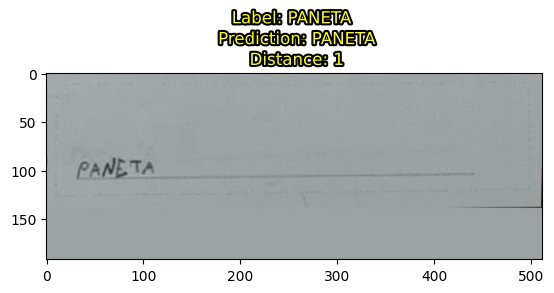

In [10]:
accum_cer = []
for index, row in tqdm(df.iterrows()):
    image = cv2.imread(row['ID'])
    text = model.predict(image)
    label = row["Label"]
    result = get_cer(label.upper(), text.upper())
    if isinstance(result, float):
        cer = result
        distance = None  # Defina um valor padrão para a distância, se necessário
    else:
        cer, distance = result
    print(f'Label: {label} - Text: {text} - CER: {cer} - Distance: {distance}')
    accum_cer.append(cer)
    save_image(image, row['ID'], label, text, distance)

print(f'Mean CER: {np.mean(accum_cer)}')
